In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Neural Decoding

- How well can you learn what the stimulus is based on the response

- How the decion making related to the neuron coherence? 

- in 100% coherence, there is no noise whcih makes the task easy. 

- 0% so much noise, so in this case there is no correct answer

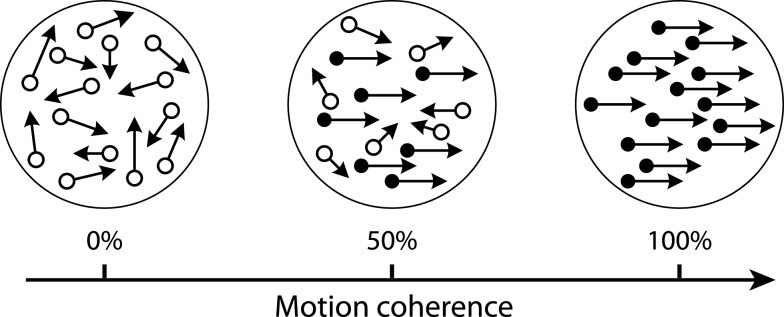

In [2]:
Image(filename= "coherence.png", width=400)

- If we have two decision distributions as the coherence decreases? the two distributions move towards each other. this decrease the ability to make a right choice of decision.

- **threeshold** the line that maximises the descions is the exact line in the middle.

- **Liklihood Ratio**

- important point is that these two distribution don't generally have the same weight. the probaility of finding a tiger in the a place is much less than the probability to find a rat. (This is the **prior** this should scale our likilhood)

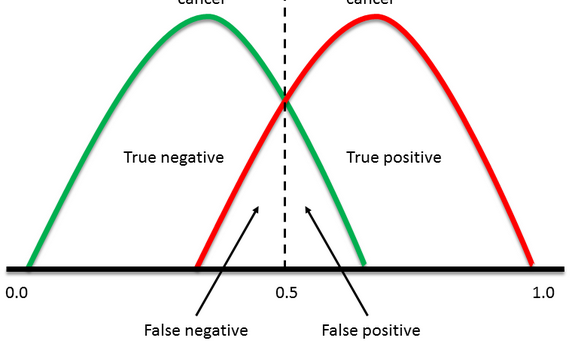

In [3]:
Image(filename= "dist_overlap.png", width=400)

## Population Coding 

Methods for populatoion coding (extracting stimuli from impulse)

- Population vector

- Bayesian Reference

- Maximum liklihood

- maximum posteriori

Crickets are very sensitive to air movements. They sense motions using the **cercai, here on the back of the abdomen**. you see these tiny fine hairs that cover their entire length. The cercal, in this case, is about 1 cm in length. So the wind velocity is transduced into an electrical signal by the movements of these hairs. They're innovated at their base by neurons that are able to sense the mechanical forces caused by their motion. So the question is, how did these neurons as a group communicate wind velocity to the animal, to aid in its escape? 

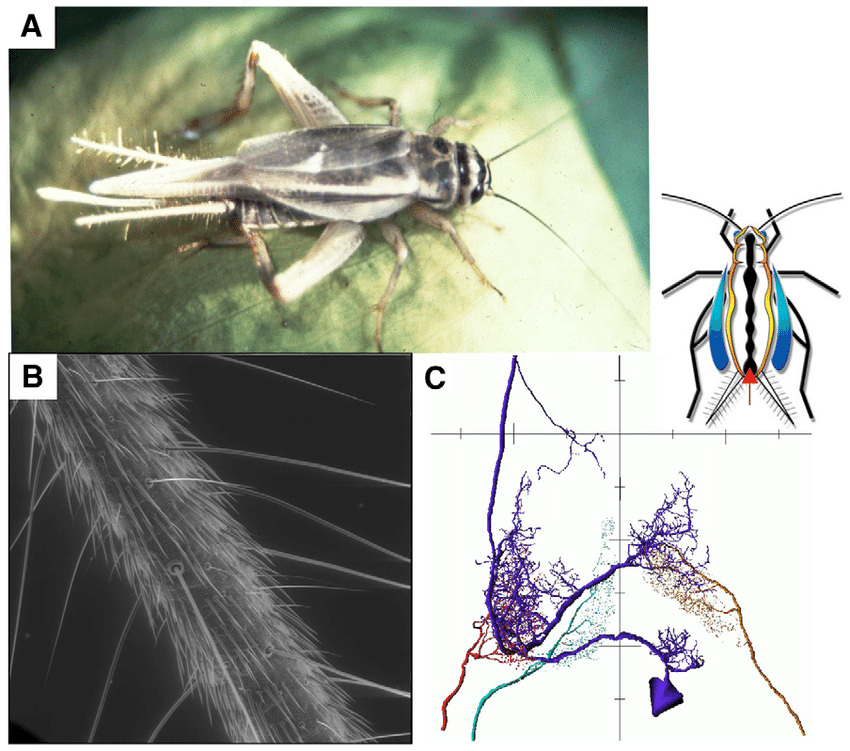

In [4]:
Image(filename= "cricket.png", width=400)

- Firing rate is related to the number of spikes generated by a neuron per unit of time. 
- the following curve is tuning curves for the four interneurons of the cricket cercal system plotted as a function of the **wind direction**.$r_{max}$ is const. Wind speed is constant.
- At low wind velocities, information about wind direction is encoded by just four interneurons. 
- The tuning curve for interneuron $a$:

${(\frac{f(s)}{r_{max}})}_{a}= \cos(s- s_a)$

$s_a$ is the prefered direction and $s$ is the wind direction

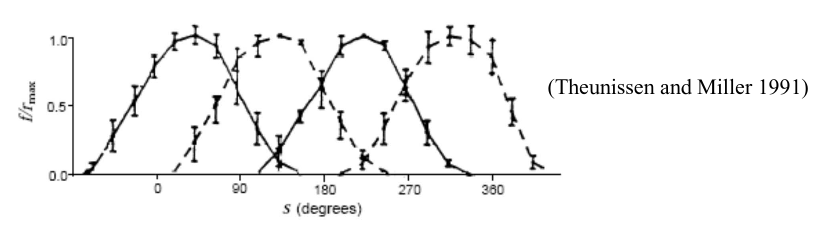

In [6]:
Image(filename= "tune_curve_cricket.png", width=600)

$C_1, C_2, C_3, C_4$ are the preferred directions 

$V$ is the wind driection

the projection of $V$ on $C_1, C_2$ are $r_1, r_2$

the $cos(s) = \frac{r_1}{\mid{V}\mid} = \frac{r}{\mid{V}\mid}$

but becuase we only deal here with direction of wind (not strength), then $cos(s)=r$, so the cosine is s is the response.

${(\frac{f(s)}{r_{max}})}_{a}= \cos(s- s_a) = V.c_a$

This means the projection of wind velocity into the preferred direction $c_a$

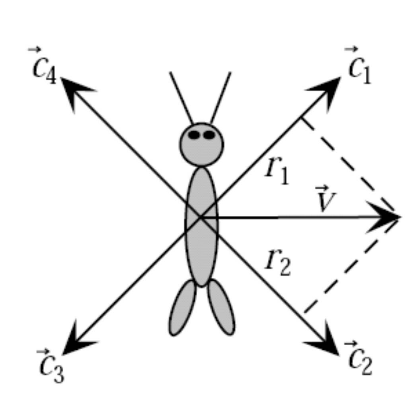

In [9]:
Image(filename= "cricket_card_directions.png", width=200)

### Population vector

Taking the responses of all the four neurons

$V_{pop}=\sum^{4}_{a=1} (\frac{r}{r_{max}})_a C_a$

This means that each neuron adds a component $C_a$ with it's preferred direction with a weight $(\frac{r}{r_{max}})$ given by it's firing rate whcih aproximates the projection of the wind direction into that preferred direction.

- Negative firing rates cannot be achieved by a neuron, A sensory neuron can respond to motion in a direction along its primary motion-sensitive axis but not to motion in a direction against it.

- This is to control motor cortical activity in order to compute a brain machine interface

- The method summery: is calculate the projection of wind into the preferred direction and add the components for all the neurons weighted with their firing rate .... This is the population vector.

- we normalize the contribution by **maximum firing rate** of each neuron. Because Some neurons have a higher firing rate and we want each neuron to contribute to the population vector in a way that is proportional to its relative activation.

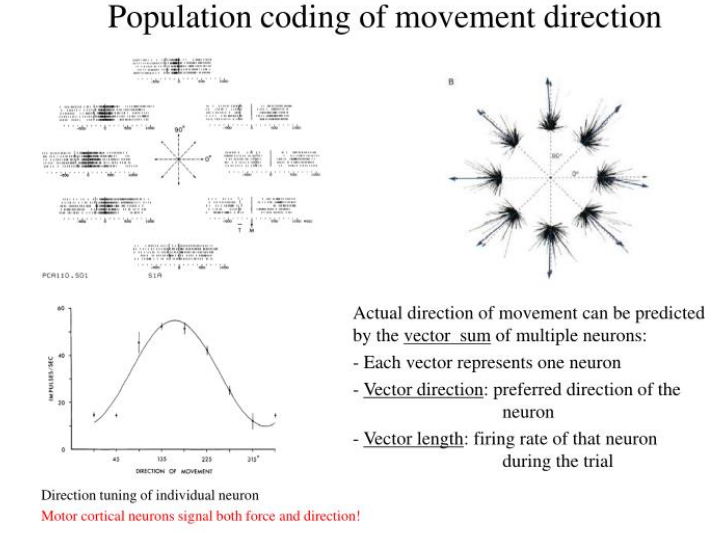

In [12]:
Image(filename= "m1_direction.png", width=500)

- Population vector is not optimal: some neurons are noisy, some neurons are better tuned than others

### Bayesian Inference:

$p(s|r)=\frac{p(r|s)*p(s)}{p(r)}$

$p(r|s)$ is the conditional distribution (liklihood function)

$p(s)$ is the prior distribution

$p(r)$ is the marginal distribution

$p(s|r)$ is the posterieri distribution

**Decoding stratigies?**

- Maximum posteriori (MAP) : search for special stimulus $s*$ that maximises $p(s|r)$
- Maximum liklihood : $s*$ that maximises $p(r|s)$


we assume that the neurons fires independently and they have poisson distribution. 
variance of a poisson neuron is equal to the mean

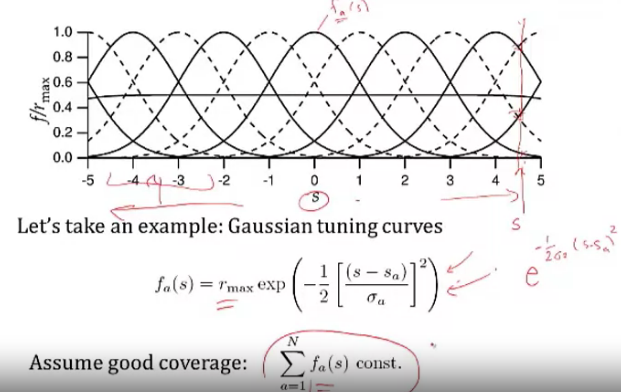

In [14]:
Image(filename= "gaussian_tune_curve.png", width=400)

**Maximum Liklihood**

- Poisson Distribution at time $T$ and spike $k$, mean firing rate $r$

$p_T(k) = (rT)^k .\frac{\exp(‐rT)}{k!}$   

for $r_a$ spike, and time $T$,  

$p(r_a|s) = f_a(s)^{r_a T}. \frac{\exp(‐f_a(s)T)}{(r_a T)!}$

$p(r_a|s) = \frac{f_a(s)^{r_a T}}{(r_a T)!}. \exp(‐f_a(s)T)$

$f_a(s)$ is the tuning curve

and assume indepndency

$p(r|s)=\prod_{a=1}^{N} \frac{f_a(s)^{r_a T}}{(r_a T)!}. \exp(‐f_a(s)T)$

taking the log

$\log(p(r|s))= T \sum_{a=1}^{N} r_a \log(f_a(s))+...$

take the derivative and set to zero

$\sum_{a=1}^{N} r_a \frac{f'(s*)}{f(s*)} = 0$

Then we solve that ...

$s* = \frac{\sum r_a s_a / \sigma_a^2}{\sum r_a / \sigma_a^2}$

This also shows that each neuron contribution is weighted by the inverse of it variance. contribution will be large if the neuron is very sharply peaked.

$s* = \frac{\sum r_a s_a}{\sum r_a}$

THat's very similar to pop vector

**Maximum Posteriori**

$\log(p(s|r))= \log(p(r|s)) + \log(p(s)) - \log(p(r))$

take the derivative and set it to zero

$r_a \frac{f'(s*)}{f(s*)} + \frac{p'(s)}{p(s)} = 0$

by solving this 

$s* = \frac{T \sum r_a s_a / \sigma_a^2 + s_{prior}/\sigma_{prior}^2}{T \sum r_a / \sigma_a^2 + 1/\sigma_{prior}^2}$

prior is having a biasing effect depends on it's variance

## Stimulus Reconstruction

- extend decoding of s to s*(t)

- we want to gte estimator $s_{bayes}$ as close as possible to $s$ that gives $r$, (evaluation of liklihood meansure p(r|s) as long as the $s_{bayes}$ is getting closer to $s$)

- differnece between $s$ and $s_{bayes}$ is the mean square error $L(s, s_{bayes}) = (s-s_{bayes})^2$

$\int ds L(s, s_{bayes}) p(s|r)$

we can take the derivative of it and set it to 0

$\frac{d}{ds_{bayes}} \int ds L(s, s_{bayes}) p(s|r) = 0$
 
solution is:

$s_{bayes} =  \int ds p(s|r) s$

This is the spike triggered average. **take all stimuli $s$ and weights them by p(s|r) and average them all**

## References:

https://www.coursera.org/learn/computational-neuroscience

https://jcp.bmj.com/content/62/1/1

Jiaxiang Zhang, The Effects of Evidence Bounds on Decision-Making: Theoretical and Empirical Developments

Gwen A Jacobs, John P Miller, Zane N Aldworth, 2008, Computational mechanisms of mechanosensory processing in the cricket

https://www.slideserve.com/hop-langley/motor-cortex

https://aiimpacts.org/rate-of-neuron-firing/

Shuai shao, University of Science and Technology of China (USTC), Population coding, Vector Coding and Distributed representing

https://stackoverflow.com/questions/57280577/sensitivity-specificity-plot-python